In [4]:
import pathlib
import textwrap
import os
import PIL.Image
import json

from dotenv import load_dotenv

In [5]:
load_dotenv()

GEMINI_API = os.getenv("GOOGLE_API")

In [6]:
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

In [7]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key=GEMINI_API)

In [8]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [9]:
model = genai.GenerativeModel('gemini-1.0-pro-vision-latest')

In [10]:
images = os.listdir(path="dataset/images")

In [11]:
len(images)

9154

In [12]:
with open(file="dataset/captions.json", mode="r+") as f:
    data = json.loads(f.read())

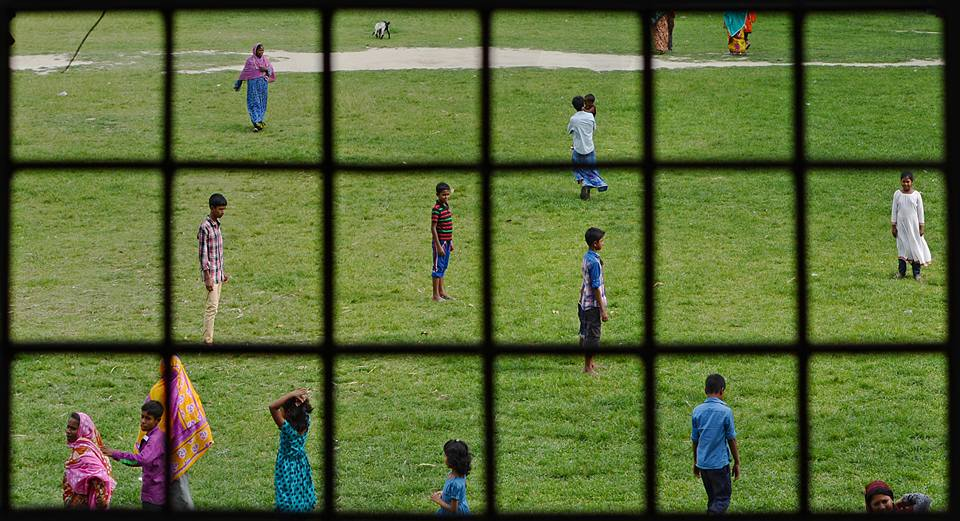

In [27]:
import PIL.Image

img = PIL.Image.open('dataset/images/123.png')
img

In [29]:
(data)[123]

{'filename': '124.png',
 'caption': ['মাঠে অনেকগুলো মানুষ দাড়িয়ে আছে।',
  'জানালার শিকের ফাক দিয়ে দেখা যাচ্ছে কিছু ছেলে মেয়ে মাঠে খেলা করছে। ']}

In [30]:
response = model.generate_content(["Write a caption in Bangla language describing the picture", img], stream=True)
response.resolve()

In [31]:
# response = model.generate_content(["Write a Question, answer pair based on this picture in Bengali language. The question should contain enquiry about something and a one word answer. Generate the quesetion answer pair in a json format with curly braces.", img], stream=True)
# response.resolve()

In [32]:
# response = model.generate_content([f'Write a Question, answer pair based on this picture and the given captions in Bengali language \n captions: {data[0]} \n \n. The question should contain enquiry about something and a one word answer. Generate one quesetion answer pair in a json format for each captions with curly braces.', img], stream=True)
# response.resolve()

In [33]:
to_markdown(response.text)

>  এই ছবিতে দেখা যাচ্ছে, কিছু ছেলেমেয়ে মাঠে খেলা করছে। মাঠের এক পাশে রয়েছে একটি গাছ। মাঠের চারপাশে রয়েছে লোহার গ্রিল। গ্রিলের বাইরে দাঁড়িয়ে আছে কয়েকজন লোক। তারা খেলা দেখছে।